# Exploratory Analysis

Mount the directory in Google Drive containing the dataset

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Import necessary python dependencies:


*   sys
*   scipy
*   numpy
*   pandas
*   sklearn







In [0]:
# sys
import sys
import warnings

# numpy
import numpy
import numpy as np
from numpy import loadtxt

# pandas
import pandas
import pandas as pd
from pandas.plotting import scatter_matrix

# matplotlib
import matplotlib.pyplot as plt

# scikit-learn
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#XGBoost
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

#LightGBM
import lightgbm as lgb 

Load the dataset from the mounted drive. Make sure that the url is pointing to the directory location of the dataset in Google Drive, and that it has **NO** header columns

In [0]:
# load the dataset
url = "/content/drive/My Drive/Colab Notebooks/Data/diabetes1.csv"
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
dataset = pandas.read_csv(url, names=names)

Show the dimensions of the dataset

In [0]:
# shape
print(dataset.shape)

(768, 9)


Show the first 20 tuples of the dataset to verify it

In [0]:
# peek
print(dataset.head(20))

    Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0             6      148             72  ...                     0.627   50        1
1             1       85             66  ...                     0.351   31        0
2             8      183             64  ...                     0.672   32        1
3             1       89             66  ...                     0.167   21        0
4             0      137             40  ...                     2.288   33        1
5             5      116             74  ...                     0.201   30        0
6             3       78             50  ...                     0.248   26        1
7            10      115              0  ...                     0.134   29        0
8             2      197             70  ...                     0.158   53        1
9             8      125             96  ...                     0.232   54        1
10            4      110             92  ...                     

Statistical summary of the dataset

In [0]:
# describe
print(dataset.describe())

       Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]


Outcome distribution of the dataset

In [0]:
# outcome distribution
print(dataset.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


Plot of the dataset

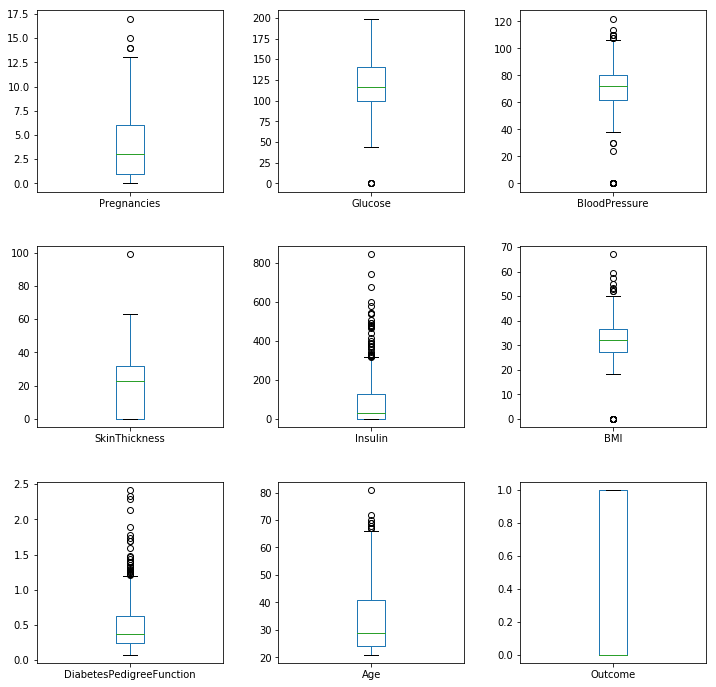

In [0]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, figsize=(12,12), layout=(3,3), sharex=False, sharey=False)
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

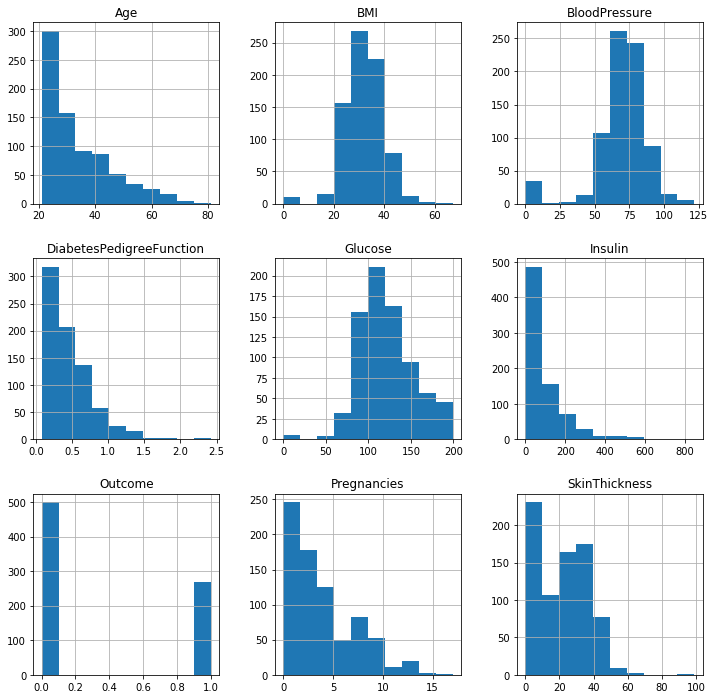

In [0]:
# histograms
dataset.hist(figsize=(12,12))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

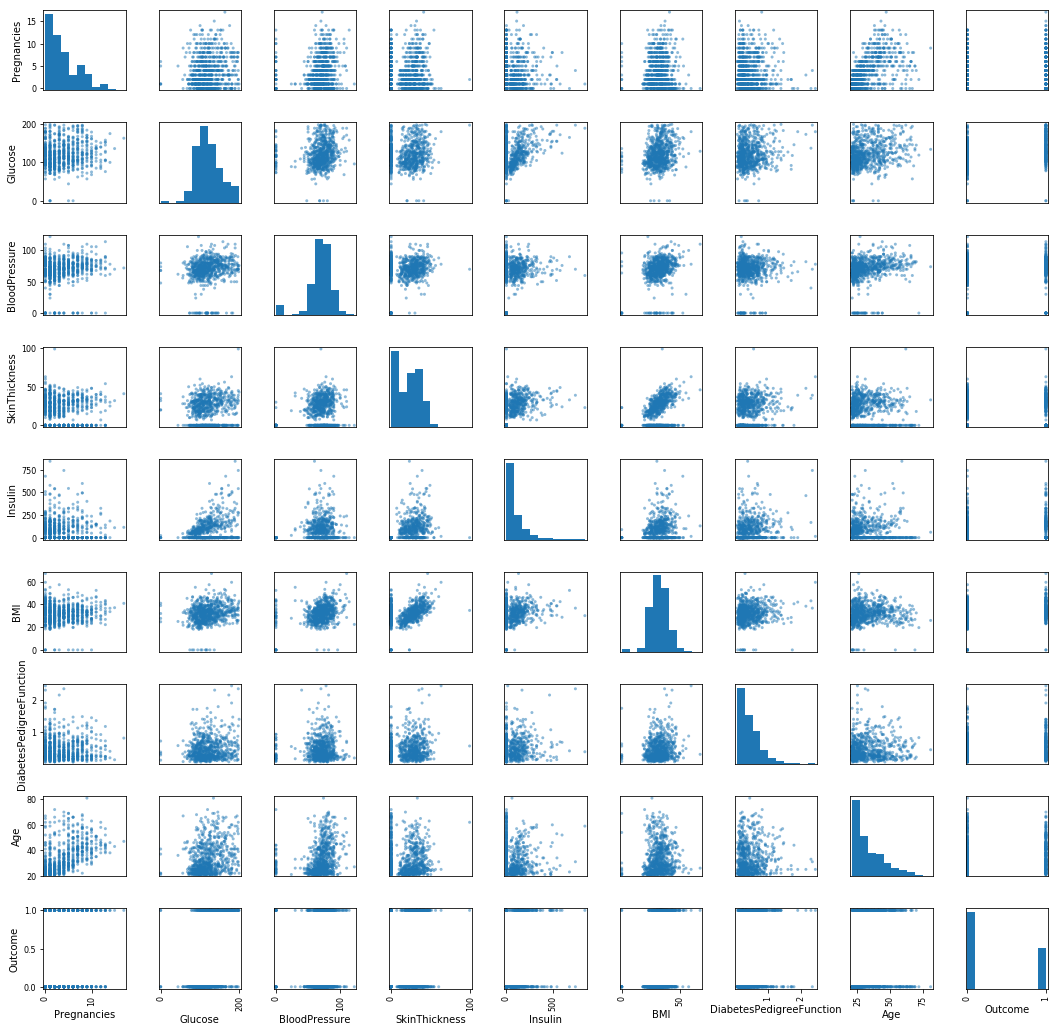

In [0]:
# scatter plot matrix
scatter_matrix(dataset, figsize=(18,18))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

# Tutorial Models

Training with tutorial models

In [0]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:7]
Y = array[:,8]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.775251 (0.060143)
LDA: 0.780063 (0.057373)
KNN: 0.697250 (0.081222)
CART: 0.680513 (0.053743)
NB: 0.755738 (0.056382)
SVM: 0.657932 (0.047735)


# XGBoost Model

Training with XGBoost

In [0]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:7]
Y = array[:,8]

# split data into train and test sets
seed = 7
test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, Y_train)

# make predictions for test data
Y_pred = model.predict(X_test)
predictions = [round(value) for value in Y_pred]

# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))



Accuracy: 80.52%


In [0]:
#XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
predictions = xgb.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[87 10]
 [20 37]]
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85        97
         1.0       0.79      0.65      0.71        57

    accuracy                           0.81       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154



# AdaBoost Model

Training with AdaBoost

In [0]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

# Split-out validation dataset
array = dataset.values
X = array[:,0:7]
Y = array[:,8]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Train Adaboost Classifer
model = abc.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = model.predict(X_validation)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_validation, Y_pred))



Accuracy: 0.7467532467532467


In [0]:
#AdaBoost
abc = AdaBoostClassifier()
abc.fit(X_train, Y_train)
predictions = abc.predict(X_validation)
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

[[84 13]
 [26 31]]
              precision    recall  f1-score   support

         0.0       0.76      0.87      0.81        97
         1.0       0.70      0.54      0.61        57

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154



# LightGBM Model

Training with LightGBM

In [0]:
import lightgbm as lgb

warnings.filterwarnings("ignore")

#Importing the dataset
X=dataset.iloc[:,[0,7]].values
y=dataset.iloc[:,8].values

#Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

#Feature Scaling
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


d_train = lgb.Dataset(x_train, label= y_train)

params = {}
params['learning_rate']= 0.003
params['boosting_type']='gbdt'
params['objective']='binary'
params['metric']='binary_logloss'
params['sub_feature']=0.5
params['num_leaves']= 10
params['min_data']=50
params['max_depth']=10

clf= lgb.train(params, d_train, 100)

y_pred = clf.predict(x_test)

#convert into binary values

for i in range(len(y_pred)):
    if (y_pred[i] >= 0.5):
        y_pred[i] = 1
    else:
        y_pred[i] =0

#Accuracy
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:",accuracy)



Accuracy: 0.6770833333333334


In [0]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[130,   0],
       [ 62,   0]])

# Logistic Regression Model

Training with Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Importing the dataset
X = dataset.iloc[:, [0,7]].values
y = dataset.iloc[:,8].values

#Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

lr = LogisticRegression() 
lr.fit(x_test, y_test)
score = metrics.accuracy_score(y_test, lr.predict(x_test))
print("Accuracy: %f" % score)



Accuracy: 0.708333


In [0]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[117  13]
 [ 51  11]]
              precision    recall  f1-score   support

           0       0.70      0.90      0.79       130
           1       0.46      0.18      0.26        62

    accuracy                           0.67       192
   macro avg       0.58      0.54      0.52       192
weighted avg       0.62      0.67      0.61       192



# GaussianNB Model

Training with GaussianNB


In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

#Importing the dataset
X= dataset.iloc[:,[0,7]].values
y= dataset.iloc[:,8].values

#Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

#Feature Scaling
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

naiveBayes = GaussianNB()
naiveBayes.fit( x_train, y_train )
score = metrics.accuracy_score(y_test, naiveBayes.predict(x_test))
print("Accuracy: %f" % score)



Accuracy: 0.692708


In [0]:
#GaussianNB
naiveBayes = GaussianNB()
naiveBayes.fit(x_train, y_train)
predictions = naiveBayes.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[109  21]
 [ 38  24]]
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       130
           1       0.53      0.39      0.45        62

    accuracy                           0.69       192
   macro avg       0.64      0.61      0.62       192
weighted avg       0.67      0.69      0.68       192



# Confusion Matrices